In [1]:
# !pip install opencv-python matplotlib imageio gdown 

In [ ]:
# !pip install tensorflow

## Import Libraries

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import gdown
import pandas as pd
import glob


## Download data

In [2]:
# url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'   #replace it with mount drive
# output = 'data.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('data.zip')

In [3]:
alignment_path = 'data/alignments/s1'
S1_path = 'data/s1'

# Get a list of the files in each folder
alignment_files = sorted(os.listdir(alignment_path))
video_files = sorted(os.listdir(S1_path))
# video_files.remove('Thumbs.db')
length=len(video_files)
data={"video":[],"alignment":[]}
for i in range(length):
    data["video"].append(video_files[i])
    data["alignment"].append(alignment_files[i])
df=pd.DataFrame(data)

In [4]:
len(df)

1000

## Fetch Video Frames

In [5]:
def draw_boundaries(img, classifier, scaleFactor, minNeighbors, color, text):
    # Converting image to gray-scale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detecting features in gray-scale image, returns coordinates, width and height of features
    features = classifier.detectMultiScale(gray_img, scaleFactor, minNeighbors)
    coords = []
    # drawing rectangle around the feature and labeling it
    for (x, y, w, h) in features:
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        cv2.putText(img, text, (x, y-4), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 1, cv2.LINE_AA)
        coords = [x, y, w, h]
    return coords

In [6]:
def detect(img, faceCascade,mouthCascade):
    color = {"blue":(255,0,0), "red":(0,0,255), "green":(0,255,0), "white":(255,255,255)}
    coords = draw_boundaries(img, faceCascade, 1.1, 10, color['green'], "face")
    #to detect the mouth inside the ROI area we put it here instead of under the "if" condition
#     mouth = draw_boundaries(img, mouthCascade, 1.1, 20, color['red'], "Mouth")  #the detection is strong but random

    # If feature is detected, the draw_boundary method will return the x,y coordinates and width and height of rectangle else the length of coords will be 0
    if len(coords)==4:
                        #y        #y        #h        #x         #x        w
#         img = img[coords[1]:coords[1]+coords[3], coords[0]:coords[0]+coords[2]]


                # Updating region of interest by cropping image lower half of the face
        ROI = img[int(coords[1] + coords[3] * 0.6):int(coords[1] + coords[3] * 0.9), int(coords[0]):int(coords[0] +coords[2])]
#         mouth = draw_boundaries(ROI, mouthCascade, 1.1, 20, color['red'], "Mouth")  poor detection


        return ROI  #return lower half of the face

    return img

In [ ]:
def load_video(path:str) -> List[float]: 
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    mouthCascade = cv2.CascadeClassifier('Mouth.xml') 
    
    cap = cv2.VideoCapture(path)
    frames = []

    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        if not ret:
            break

        mouth = detect(frame, faceCascade,mouthCascade)
        mouth_size=(140,40)
        img=cv2.resize(mouth, mouth_size)

        frame = tf.image.rgb_to_grayscale(img)
        

        frames.append(frame)
        
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [ ]:
def save_frames(frames,path): #we need to create frames for each video
    frame_count =0
    
    #create main directory
    if not os.path.exists('frames'):
        os.makedirs('frames')
        
    #create directory per video
    child_folder_path = os.path.join('frames', f"{path}_frame")
    if not os.path.exists(child_folder_path):
        os.makedirs(child_folder_path)
    for frame in frames :
        filename = f"{path}_frame_{frame_count:02d}.jpg"
        cv2.imwrite(os.path.join(child_folder_path,filename), frame)

        frame_count +=1
        
    print(f"{path} frames saved!")

In [ ]:
def extract_frames(path):
    frames,path=load_frames(path)
    save_frames(frames,path)

In [ ]:
df["video"].apply(lambda x:extract_frames(x))

data\s1\bbaf2n.mpg
bbaf2n frames saved!
data\s1\bbaf3s.mpg
bbaf3s frames saved!
data\s1\bbaf4p.mpg
bbaf4p frames saved!
data\s1\bbaf5a.mpg
bbaf5a frames saved!
data\s1\bbal6n.mpg
bbal6n frames saved!
data\s1\bbal7s.mpg
bbal7s frames saved!
data\s1\bbal8p.mpg
bbal8p frames saved!
data\s1\bbal9a.mpg
bbal9a frames saved!
data\s1\bbas1s.mpg
bbas1s frames saved!
data\s1\bbas2p.mpg
bbas2p frames saved!
data\s1\bbas3a.mpg
bbas3a frames saved!
data\s1\bbaszn.mpg
bbaszn frames saved!
data\s1\bbaz4n.mpg
bbaz4n frames saved!
data\s1\bbaz5s.mpg
bbaz5s frames saved!
data\s1\bbaz6p.mpg
bbaz6p frames saved!
data\s1\bbaz7a.mpg
bbaz7a frames saved!
data\s1\bbbf6n.mpg
bbbf6n frames saved!
data\s1\bbbf7s.mpg
bbbf7s frames saved!
data\s1\bbbf8p.mpg
bbbf8p frames saved!
data\s1\bbbf9a.mpg
bbbf9a frames saved!
data\s1\bbbm1s.mpg
bbbm1s frames saved!
data\s1\bbbm2p.mpg
bbbm2p frames saved!
data\s1\bbbm3a.mpg
bbbm3a frames saved!
data\s1\bbbmzn.mpg
bbbmzn frames saved!
data\s1\bbbs4n.mpg
bbbs4n frames saved!


## Fetch Transcripts and phonemes

In [ ]:
# Load the CMU Pronouncing Dictionary
# nltk.download('cmudict')
# nltk.download('punkt')


import nltk
from nltk.corpus import cmudict
from nltk.tokenize import word_tokenize

In [ ]:
##1 create phonemes files for each video
# Define function to convert a word to its phonemes
def word_to_phonemes(word):
    pronouncing_dict = cmudict.dict()
    phonemes = pronouncing_dict[word.lower()][0]
#     print(pronouncing_dict[word.lower()])
    if phonemes:
        return phonemes
    else:
        # If the word is not in the dictionary, return an empty list
        return []

# Define function to convert a sentence to its phonemes
def sentence_to_phonemes(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Convert each word to its phonemes
    phonemes = [word_to_phonemes(word) for word in words]
    

    return phonemes

## For Inference 

In [ ]:
def phonems_to_word(phonemes):
    d = cmudict.dict()

    # Convert the phonetic transcription back to a word
    reverse_word = ""
    pronunciations = [p for w, p in d.items() if p[0] == phonemes]
    if len(pronunciations) > 0:
        words = [w for w, p in d.items() if p in pronunciations]
        if len(words) > 0:
            reverse_word = max(words, key=lambda x: d[x])
    return reverse_word # Output: "example"

In [ ]:
def phonemes_to_sentence(phonemes_list):
    words=[]
    for phonemes in phonemes_list:
        word=phonems_to_word(phonemes)
        words.append(word)

    sentence=" ".join(words)
    print(sentence)
    return sentence
    

In [ ]:
def extract_phonemes(path):
    path = os.path.join('data','alignments','s1',f'{path}') #get alignment path

    with open(path, 'r') as f: 
        lines = f.readlines() 
    start_times = []
    end_times = []
    phonemes = []

    for line in lines:
        parts = line.strip().split()
        start_time = float(parts[0])
        end_time = float(parts[1])
        if parts[2] not in ["sil","sp"]:
            phoneme= sentence_to_phonemes(parts[2])
        else :
            phoneme=parts[2]
        
        start_times.append(start_time)
        end_times.append(end_time)
        
        if type(phoneme)== list:
            phonemes.append(phoneme[0])
        else:
              phonemes.append([phoneme])
       
    #phonemes directory
    if not os.path.exists('phonemes'):
        os.makedirs('phonemes')
    
    #get file name
    
    name=(path.split("\\")[3]).split(".")[0]
    output_file=f"{name}_phonemes.txt"
    output_file = os.path.join("phonemes", output_file)

    print(phonemes)
    
    
#     with open(output_file, 'w') as f:
#         for i in range(len(start_times)):
#             f.write("{:.3f} {:.3f} {}\n".format(start_times[i], end_times[i],phonemes[i] ) )
#         f.close()
    return start_times,end_times,phonemes


In [ ]:
df.head()

In [69]:
df["alignment"].apply(lambda x:extract_phonemes(x))

['sil', ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'F'], ['T', 'UW1'], ['N', 'AW1'], 'sil']
['sil', ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'F'], ['TH', 'R', 'IY1'], ['S', 'UW1', 'N'], 'sil']
['sil', ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'F'], ['F', 'AO1', 'R'], ['P', 'L', 'IY1', 'Z'], 'sil']
['sil', ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'F'], ['F', 'AY1', 'V'], ['AH0', 'G', 'EH1', 'N'], 'sil']
['sil', ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'L'], ['S', 'IH1', 'K', 'S'], ['N', 'AW1'], 'sil']
['sil', ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'L'], ['S', 'EH1', 'V', 'AH0', 'N'], ['S', 'UW1', 'N'], 'sil']
['sil', ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'L'], ['EY1', 'T'], ['P', 'L', 'IY1', 'Z'], 'sil']
['sil', ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'L'], ['N', 'AY1', 'N'], ['AH0', 'G', 'EH1', 'N'], 'sil']
['sil', ['B', 'IH1', 'N'],

KeyboardInterrupt: 

In [ ]:
x=sentence_to_phonemes("hello adam how are you")


In [ ]:
x

In [ ]:
phonemes_to_sentence(x)

## Mapping phonemes to frames

In [16]:
def map_phonemes_to_frames(timestamps,end,frames,phonems):
    word_frames = {}
    for i in range(len(timestamps)):
        start_frame = int(( timestamps[i] * len(frames)) // end[-1])
        end_frame =  int((timestamps[i+1] * len(frames)) // end[-1] if i+1 < len(timestamps) else len(frames))
        print(start_frame,end_frame)
        
        word = phonems[i]
        for j in range(start_frame, end_frame):
            if j not in word_frames:
                word_frames[j] = word
            else:
                word_frames[j] += " " + word
                
    return word_frames

In [ ]:
def phonemes_frames(path,frames):
    print(path)
    timestamps,end,phonems=extract_phonemes(path)
    word_frames=map_phonemes_to_frames(timestamps,end,frames,phonems)
    
    return word_frames

In [ ]:
df

In [ ]:
test_list=['bbaf2n.align',  #testing on 10 videos
  'bbaf3s.align',
  'bbaf4p.align',
  'bbaf5a.align',
  'bbal6n.align',
  'bbal7s.align',
  'bbal8p.align',
  'bbal9a.align',
  'bbas1s.align',
  'bbas2p.align']

In [ ]:
frames=np.arange(75) #num of frames

In [107]:
word_frame_list=[]

for alignment in test_list:
    word_frame_list.append(phonemes_frames(alignment, frames))
    
with open('frame_paths.pkl', 'wb') as file:
    pickle.dump(word_frame_list, file)

bbaf2n.align
[['sil'], ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'F'], ['T', 'UW1'], ['N', 'AW1'], ['sil']]
0 23
23 29
29 34
34 35
35 41
41 47
47 53
53 75
bbaf3s.align
[['sil'], ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'F'], ['TH', 'R', 'IY1'], ['S', 'UW1', 'N'], ['sil']]
0 17
17 22
22 27
27 28
28 31
31 36
36 47
47 75
bbaf4p.align
[['sil'], ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'F'], ['F', 'AO1', 'R'], ['P', 'L', 'IY1', 'Z'], ['sil']]
0 17
17 22
22 26
26 28
28 33
33 38
38 47
47 75
bbaf5a.align
[['sil'], ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'F'], ['F', 'AY1', 'V'], ['AH0', 'G', 'EH1', 'N'], ['sil']]
0 17
17 23
23 30
30 35
35 43
43 49
49 57
57 75
bbal6n.align
[['sil'], ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1', 'L'], ['S', 'IH1', 'K', 'S'], ['N', 'AW1'], ['sil']]
0 16
16 21
21 26
26 27
27 31
31 39
39 45
45 75
bbal7s.align
[['sil'], ['B', 'IH1', 'N'], ['B', 'L', 'UW1'], ['AE1', 'T'], ['EH1',

In [23]:
with open('encoded_paths.pkl', 'rb') as file:
    loaded_list = pickle.load(file)

## Encoding phonemes

In [ ]:
def label_encode(phonemes) :
    phoneme_labels = {
    "": ["SIL"],
    "AA": ["AA0"],
    "AA1" : ["AA1"], 
    "AA2" : ["AA2"],
    "AE": ["AE0"],
    "AE1" : ["AE1"],
    "AE2" : ["AE2"],
    "AH": ["AH0"],
    "AH1" : ["AH1"],
    "AH2" : ["AH2"],
    "AO": ["AO0"],
    "AO1" : ["AO1"], 
    "AO2" : ["AO2"],
    "AW": ["AW0"],
    "AW1" : ["AW1"], 
    "AW2" : ["AW2"],
    "AY": ["AY0"],
    "AY1" : ["AY1"],
    "AY2" : ["AY2"],
    "B": ["B"],
    "CH": ["CH"],
    "D": ["D"],
    "DH": ["DH"],
    "EH": ["EH0"],
    "EH1" : ["EH1"], 
    "EH2" : ["EH2"],
    "ER": ["ER0"], 
    "ER1" : ["ER1"],
    "ER2" : ["ER2"],
    "EY": ["EY0"] ,
    "EY1" : ["EY1"],
    "EY2" : ["EY2"],
    "F": ["F"],
    "G": ["G"],
    "HH": ["HH"],
    "IH": ["IH0"],
    "IH1":["IH1"], 
    "IH2" : ["IH2"],
    "IY": ["IY0"],
    "IY1" :["IY1"] ,
    "IY2":["IY2"] ,
    "JH": ["JH"],
    "K": ["K"],
    "L": ["L"],
    "M": ["M"],
    "N": ["N"],
    "NG": ["NG"],
    "OW": ["OW0"], 
    "OW1": ["OW1"], 
    "OW2" : ["OW2"],
    "OY": ["OY0"],
    "OY1" : ["OY1"], 
    "OY2": ["OY2"],
    "P": ["P"],
    "R": ["R"],
    "S": ["S"],
    "SH": ["SH"],
    "T": ["T"],
    "TH": ["TH"],
    "UH": ["UH0"], 
    "UH1" : ["UH1"], 
    "UH2" : ["UH2"],
    "UW": ["UW0"],
    "UW1" : ["UW1"],
    "UW2" : ["UW2"],
    "V": ["V"],
    "W": ["W"],
    "Y": ["Y"],
    "Z": ["Z"],
    "ZH": ["ZH"]
}


    phoneme_indices = {p: i for i, p in enumerate(phoneme_labels)}  
    
#     print(d for d in phonemes)
    phonemes=[re.sub(r'\d', '', phoneme) for phoneme in phonemes]
#     print(phonemes)
    encoded = np.zeros(len(phoneme_labels))
    
    for phoneme in phonemes:
        if phoneme in ["sil","SIL","sp","SP"]:
            phoneme=""
        if phoneme in phoneme_labels.keys():
                index = phoneme_indices[phoneme]
                encoded[index] = index
                

        else:
            print(f"{phoneme} is not in the phoneme labels dictionary")
    print(encoded)
    return encoded

In [ ]:
def match_word_frame(word_frames):
    matched={}
    
    for key, value in word_frames.items():
        matched[key]=label_encode(value)
    return matched   

In [287]:
y=[match_word_frame(word_frame) for word_frame in loaded_list]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [315]:
vectors = [value for my_dict in y for value in my_dict.values()]
len(vectors)

750

## Generate Images

In [53]:
# Step 2: Create a list of dictionaries that links each image with its corresponding label
dir_path="frames"
imgs_path = []
for class_name in os.listdir(dir_path): #for each video folder
    class_path = os.path.join(dir_path, class_name) #get folder name
    for filename in os.listdir(class_path): #for each frame
        file_path = os.path.join(class_path, filename)
#         label = label_map[class_name]
        print(filename)
        imgs_path.append({'filename': file_path})
    
# Step 3: Convert the list of dictionaries to a Pandas dataframe




bbaf2n_frame_00.jpg
bbaf2n_frame_01.jpg
bbaf2n_frame_02.jpg
bbaf2n_frame_03.jpg
bbaf2n_frame_04.jpg
bbaf2n_frame_05.jpg
bbaf2n_frame_06.jpg
bbaf2n_frame_07.jpg
bbaf2n_frame_08.jpg
bbaf2n_frame_09.jpg
bbaf2n_frame_10.jpg
bbaf2n_frame_11.jpg
bbaf2n_frame_12.jpg
bbaf2n_frame_13.jpg
bbaf2n_frame_14.jpg
bbaf2n_frame_15.jpg
bbaf2n_frame_16.jpg
bbaf2n_frame_17.jpg
bbaf2n_frame_18.jpg
bbaf2n_frame_19.jpg
bbaf2n_frame_20.jpg
bbaf2n_frame_21.jpg
bbaf2n_frame_22.jpg
bbaf2n_frame_23.jpg
bbaf2n_frame_24.jpg
bbaf2n_frame_25.jpg
bbaf2n_frame_26.jpg
bbaf2n_frame_27.jpg
bbaf2n_frame_28.jpg
bbaf2n_frame_29.jpg
bbaf2n_frame_30.jpg
bbaf2n_frame_31.jpg
bbaf2n_frame_32.jpg
bbaf2n_frame_33.jpg
bbaf2n_frame_34.jpg
bbaf2n_frame_35.jpg
bbaf2n_frame_36.jpg
bbaf2n_frame_37.jpg
bbaf2n_frame_38.jpg
bbaf2n_frame_39.jpg
bbaf2n_frame_40.jpg
bbaf2n_frame_41.jpg
bbaf2n_frame_42.jpg
bbaf2n_frame_43.jpg
bbaf2n_frame_44.jpg
bbaf2n_frame_45.jpg
bbaf2n_frame_46.jpg
bbaf2n_frame_47.jpg
bbaf2n_frame_48.jpg
bbaf2n_frame_49.jpg


In [135]:
with open('frames_paths.pkl', 'wb') as file:
    pickle.dump(imgs_path, file)

In [136]:
with open('frames_paths.pkl', 'rb') as file:
    frames_paths = pickle.load(file)

In [312]:
#----------------------------------------------------------------------------------
tryout=imgs_path[:750] #10videos * 75 frames

In [64]:
values_list = []

# Loop over each dictionary in the list
for d in y:
    # Loop over each value in the dictionary and append it to the values list
    for value in d.values():
        values_list.append(value)

# Print the values list
print(len(values_list))

750


In [323]:
# data = { imgs_path, 'encoded phonemes': values_list}

# Create a DataFrame from the dictionary
test_data=pd.DataFrame(tryout)

In [324]:
len(test_data)

750

In [325]:
test_data["vectors"]=vectors

In [327]:
test_data

,filename,vectors
0,frames\bbaf2n_frame\bbaf2n_frame_00.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,frames\bbaf2n_frame\bbaf2n_frame_01.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,frames\bbaf2n_frame\bbaf2n_frame_02.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,frames\bbaf2n_frame\bbaf2n_frame_03.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,frames\bbaf2n_frame\bbaf2n_frame_04.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
745,frames\bbal7s_frame\bbal7s_frame_70.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
746,frames\bbal7s_frame\bbal7s_frame_71.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
747,frames\bbal7s_frame\bbal7s_frame_72.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
748,frames\bbal7s_frame\bbal7s_frame_73.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [328]:
target="vectors"
x=test_data.drop(columns=target)
y=test_data[target]

In [329]:
y

0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
745    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
746    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
747    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
748    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
749    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: vectors, Length: 750, dtype: object

In [ ]:
# Get the unique values of the dictionary
unique_values = []
for value in word_frames.values():
            
    if value not in unique_values:
        unique_values.append(value)# test=list(unique_values)
        
unique_values.append("sil")
# test
# test=[list(x) for x in test]
# # phonemes_to_sentence(test)
# test
# phonemes_to_sentence(test)

In [ ]:
unique_values

In [ ]:
def reverse_label_encode(index):
    phoneme = list(phoneme_indices.keys())[list(phoneme_indices.values()).index(index)]
    return phoneme

In [ ]:
reverse_label_encode

In [ ]:
def reverse_label_encoded_vector(vector):
    phonemes = [reverse_label_encode(index) for index in vector if len(reverse_label_encode(index))>0]
    return phonemes

In [ ]:
vector =[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 17.,  0.,  0.,  0.,  0.,  0., 23.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.]
phonemes = reverse_label_encoded_vector(vector)
print(phonemes)

##  Modeling

In [330]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [331]:
from PIL import Image

# Define a function to convert images to grayscale
def to_grayscale(img):
    return Image.fromarray(np.dot(np.array(img, dtype='float32'), [0.2989, 0.5870, 0.1140])).convert('L')



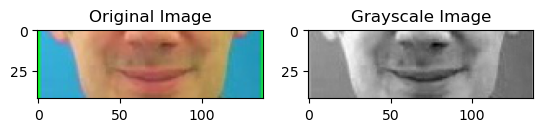

In [332]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img = Image.open('bbaf3s_frame_00.jpg')

# Convert the image to grayscale
gray_img = to_grayscale(img)

# Display the original and grayscale images
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title('Grayscale Image')
plt.show()

In [333]:
test_data

,filename,vectors
0,frames\bbaf2n_frame\bbaf2n_frame_00.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,frames\bbaf2n_frame\bbaf2n_frame_01.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,frames\bbaf2n_frame\bbaf2n_frame_02.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,frames\bbaf2n_frame\bbaf2n_frame_03.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,frames\bbaf2n_frame\bbaf2n_frame_04.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
745,frames\bbal7s_frame\bbal7s_frame_70.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
746,frames\bbal7s_frame\bbal7s_frame_71.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
747,frames\bbal7s_frame\bbal7s_frame_72.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
748,frames\bbal7s_frame\bbal7s_frame_73.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Fetching Data

In [340]:

from tensorflow.keras.preprocessing.image import img_to_array

def load_data(image_path, target):
    # Load the image using cv2
    img = cv2.imread(image_path)
    # Convert the color space from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize the image to the target size
    img = cv2.resize(img, (140,140))
    # Convert the image to a numpy array and scale the pixel values to the range [0, 1]
    img_array = img_to_array(img) / 255.
    # Return the image and target vectors
    return img_array, target

In [373]:
image_gen = ImageDataGenerator(
    validation_split=0.1,  # split the data into training and validation sets
#     preprocessing_function=lambda x: load_data(x['filename'], x['vectors'])  # fetch data correctlt,
    
)



In [374]:
test_data

,filename,vectors
0,frames\bbaf2n_frame\bbaf2n_frame_00.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,frames\bbaf2n_frame\bbaf2n_frame_01.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,frames\bbaf2n_frame\bbaf2n_frame_02.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,frames\bbaf2n_frame\bbaf2n_frame_03.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,frames\bbaf2n_frame\bbaf2n_frame_04.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
745,frames\bbal7s_frame\bbal7s_frame_70.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
746,frames\bbal7s_frame\bbal7s_frame_71.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
747,frames\bbal7s_frame\bbal7s_frame_72.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
748,frames\bbal7s_frame\bbal7s_frame_73.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [401]:
# Step 3: Load the data using the image generator


##input shape= targe size
train_generator = image_gen.flow_from_dataframe(
    dataframe=test_data,
#     color_mode="grayscale",
    directory=None,  # set to None since the file paths are already in the dataframe
    x_col='filename',
    y_col='vectors',
    target_size=(140, 140,1),  # set the target size of the images
    batch_size=75,
    class_mode="input",  # set to 'multioutput' to handle sparse vector targets
    subset='training'  # set to 'training' to load the training set
)



Found 675 validated image filenames.


In [402]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  750 non-null    object
 1   vectors   750 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB


In [403]:
# Generate data from the directory using a dataframe
test_generator = image_gen.flow_from_dataframe(
    dataframe=test_data,
    color_mode="grayscale",
    directory=None,  # set to None since the file paths are already in the dataframe
    x_col='filename',
    y_col='vectors',
    target_size=(140, 140),  # set the target size of the images
    batch_size=75,
    class_mode="input",  # set to 'multioutput' to handle sparse vector targets
    subset='validation'  # set to 'training' to load the training set
)

Found 75 validated image filenames.


## Train

In [404]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, LSTM, Bidirectional, Dense, Input, Dropout, TimeDistributed,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.backend import ctc_batch_cost
# from tensorflow.keras.losses import CTCLoss  #tensorflow 2.4 it needs to be updated
# from tensorflow.nn.ctc_batch_cost

In [405]:
tf.__version__

'2.12.0'

In [410]:
model=Sequential([
    Conv3D(76, 1, activation='relu', input_shape=(75,140,140,1),padding="same"),
                                                    #(140,140,1)
    MaxPooling3D((1,2, 2)),

    Conv3D(128, 1, activation='relu',padding="same"),
    MaxPooling3D((1,2, 2)),

    Conv3D(260, 3, activation='relu',padding="same"),
    MaxPooling3D((1,2, 2)),
    TimeDistributed(Flatten()), #to get output per each frame


    #------------------generating Text-----------------#
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(.2),

    Bidirectional(LSTM(128, return_sequences=True)),


    Dense(128, activation='relu'),
    Dense(75,  activation='softmax') #the woutput will be one-hot encoding of the alphabet
    
])

In [416]:
import tensorflow.keras.backend as K


def ctc_loss(y_true, y_pred):
    return K.ctc_batch_cost(y_true, y_pred, (75,140,140,1), 70)


In [417]:
model.compile(optimizer=Adam(learning_rate=0.001,), loss=ctc_loss,metrics=["accuracy"]) #,metrics=["accuracy"]


In [ ]:
history=model.fit(train_generator, epochs=10)


### the error is cause of losing the extra dimension in videos which is timesteps and the batch dimension where ctcloss takes in videos in batches , that's concludes that the tensorflow DataSet is much appropriate for this issue